# Homework 3

### Due: Monday April 11th @ 11:59pm

In this homework we will be performing 

- feature cleaning and engineering

- dimensionality reduction with feature selection and extraction

## Instructions

- Follow the comments below and fill in the blanks (\_\_\_\_) to complete.
- Where not specified, please run functions with default argument settings.
- Please **'Restart and Run All'** prior to submission.
- **Save pdf in Landscape** and **check that all of your code is shown** in the submission.
- When submitting in Gradescope, be sure to **select which page corresponds to which question.**

Out of 50 points total.

# Part 0: Environment Setup

In [1]:
# 1. (1pts) Set up our environment with comman libraries and plotting.
#    Note: generally we would do all of our imports here but some imports
#    have been left till later where they are used.

# Import numpy, pandas, matplotlib.pyplot and seaborn with our usual aliases.
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Execute the matplotlib magic function to display plots inline
%matplotlib inline

# Part 1: Data Cleaning and Feature Selection

In this section we will be loading, cleaning and transforming a small set of data related to loan applications.

There are two files, one containing loan application information and the other containing borrower information.

You will need to load both files, join them and then transform this data, creating a new dataframe with features which could then be used for modeling.

## Data Preparation

In [2]:
# 2. (1pts) Load Loan Application Data

# Read in the first dataframe containing loan application information.
# The path to the datafile is '../data/hw3_loan.csv'.
# Use the appropriate pandas command to read a csv file with default arguments.
# Store this dataframe as df_loan.
df_loan = pd.read_csv('../data/hw3_loan.csv')

# Print the .info() of df_loan and check the size 
#   (should be 663 rows, 4 columns, 2 columns with missing values)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          663 non-null    int64  
 1   WasTheLoanApproved  663 non-null    object 
 2   LoanReason          640 non-null    object 
 3   RequestedAmount     651 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.8+ KB


In [3]:
# 3. (2pts) Check for Duplicates and Set Index

# Assert that there are no duplicates in the CustomerID column of df_loan
assert df_loan['CustomerID'].duplicated().sum() == 0

# Set the index of df_loan to the CustomerID column to make joining easier
#    use .set_index()
#    drop the original index
#    store as df_loan (either overwrite variable or use inplace=True)
df_loan.set_index('CustomerID', drop = True, inplace = True)

# Display the first 3 rows of df_loan to visually confirm that the index has been set
# Note that CustomerID starts at 2 instead of 0
df_loan.head(3)

,WasTheLoanApproved,LoanReason,RequestedAmount
CustomerID,,,
2,Y,goods,3074.0
3,N,auto,939.0
4,Y,auto,2507.0


In [4]:
# 4. (2pts) Load Borrower Data

# Read in a second table containing borrower information.
# The path to the datafile is '../data/hw3_borrower.csv'.
# Use the appropriate pandas command to read a csv file.
# IMPORTANT: set 'CustomerID' index using the index_col= argument.
# Store this dataframe as df_borrower.
df_borrower = pd.read_csv('../data/hw3_borrower.csv', index_col = 'CustomerID')

# Print the .info() of df_borrower (should be 633 rows, 1 column w/ no missing values)
# Note that the index has also been set (should be 663 entries, 2 to 750)
df_borrower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     663 non-null    float64
dtypes: float64(1)
memory usage: 10.4 KB


In [5]:
# 5. (2pts) Join Datasets

# Join the df_loan and df_borrower
# Perform a left join, with df_loan as the "left" table 
#    and df_borrower as the right.
# Since the dataframes share an index (CustomerID), it is convenient 
#    to use the .join() function instead of .merge().
# Store the resulting dataframe as df
df = df_loan.join(df_borrower, how = 'left')

# Print the .info() of df
# There should still be 663 rows with 4 columns, 2 with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WasTheLoanApproved  663 non-null    object 
 1   LoanReason          640 non-null    object 
 2   RequestedAmount     651 non-null    float64
 3   Age                 663 non-null    float64
dtypes: float64(2), object(2)
memory usage: 42.1+ KB


In [6]:
# 6. (1pts) Create df_features

# We are performing the transformations below in order to use this data for modeling.
#
# Instead of adding transformed features into our original dataframe (df)
#   it is convenient to create a new dataframe containing only features.
# This will eventually be the X features for our models.

# Create a new, empty, DataFrame called df_features
#   that has the same index as df (index=df.index)
df_features = pd.DataFrame(index=df.index)

# Print the .info() of df_features
# The index should match the index of df above, but otherwise be empty
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 2 to 750
Empty DataFrame

## Data Exploration and Transformation

### RequestedAmount

In [7]:
# 7. (2pts) Fill Missing Values in RequestedAmount

# RequestedAmount is a numeric feature with missing values
# Before filling the missing values we should create a dummy variable
#   to capture which rows had missing values

# We want to store this as an int instead of a boolean.
# Use .isna().astype(int) on the RequestedAmount column 
#   to both find null values and convert bool to int.
# Store in df_features as 'RequestedAmount_missing'.
df_features['RequestedAmount_missing'] = df['RequestedAmount'].isna().astype(int)

# Print the number of 0s and 1s in the RequestedAmount_missing column using .value_counts().
#   (There should be 12 1s indicated 12 missing values)
df_features['RequestedAmount_missing'].value_counts()

0    651
1     12
Name: RequestedAmount_missing, dtype: int64

<AxesSubplot:xlabel='RequestedAmount', ylabel='Count'>

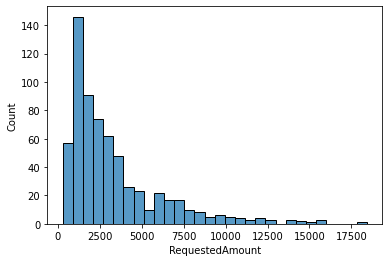

In [8]:
# 8. (1pts) Plot RequestedAmount

# Use seaborn histplot to plot df.RequestedAmount using default settings.
# Note that this feature is right skewed and has a wide range.
sns.histplot(df.RequestedAmount)

In [9]:
# 9. (2pts) Fill Missing Values in RequestedAmount

# As RequestedAmount is right skewed, we'll fill missing values using median.
# Use fillna() to fill the missing values in RequestedAmount 
#   with the median of RequestedAmount
# We'll make one more transformation to this column before storing it as a feature
#   so store back into df as df['RequestedAmount'] or use inplace=True
df['RequestedAmount'] = df['RequestedAmount'].fillna(df['RequestedAmount'].median())

# Use assert and the sum of .isna() to check that there
#    are no longer any missing values in RequestedAmount
assert df['RequestedAmount'].isna().sum() == 0

<AxesSubplot:xlabel='RequestedAmount_log', ylabel='Count'>

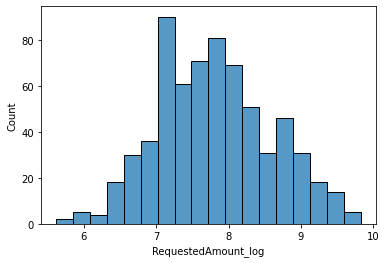

In [10]:
#10. (2pts) Log Transform RequestedAmount

# Using .apply(), apply np.log to the RequestedAmount column.
# Store the result back into df as RequestedAmount_log
df['RequestedAmount_log'] = df['RequestedAmount'].apply(lambda x: np.log(x))

# Use seaborn histplot to plot RequestedAmount_log using default settings.
# Note that the shape is is closer to a normal distribution
sns.histplot(df['RequestedAmount_log'])

In [11]:
# 11. (3pts) Center and Scale RequestedAmount_log Using StandardScaler

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Using StandardScaler (with default settings) 
#   run fit_transform to standardize RequestedAmount_log
# Note that fit_transform expects a DataFrame not a Series.
# Use df[['RequestedAmount_log']] to get a dataframe instead of a Series.
# Store the result in df_features as 'ReqAmount_logscaled'
ss = StandardScaler()
df_features['ReqAmount_logscaled'] = ss.fit_transform(df[['RequestedAmount_log']])

# Confirm that scaling has been applied properly by printing out 
#    the 'mean' and 'std' of df_features.RequestedAmount_logscaled
#    using the .agg() function 
#    and rounded to a precision of 2 using .round(2)
print(df_features.ReqAmount_logscaled.agg(['mean', 'std']).round(2))

mean    0.0
std     1.0
Name: ReqAmount_logscaled, dtype: float64


### LoanReason

In [12]:
# 12. (1pts) LoanReason Values

# df.LoanReason is a categorical variable.

# Print the frequency counts of each category, including missing values
#   using .value_counts() with dropna=False
# (You should see a row for NaN 23 indicating 23 missing values)
df.LoanReason.value_counts(dropna=False)

goods     299
auto      210
other      88
school     43
NaN        23
Name: LoanReason, dtype: int64

In [13]:
# 13. (2pts) Fill Missing Values in LoanReason

# Since this is a categorical variable, instead of creating a "missing" dummy column
#    we'll simply fill the missing values with the string 'MISSING'

# Fill the missing values of LoanReason with the string 'MISSING'
# Store back into df as LoanReason or use inplace=True
df['LoanReason'].fillna("MISSING", inplace = True)

# Print the number of items in each category in LoanReason, including nan's
#   using value_counts with dropna=False
# (You should see a row for MISSING but no row for NaN)
df['LoanReason'].value_counts(dropna = False)

goods      299
auto       210
other       88
school      43
MISSING     23
Name: LoanReason, dtype: int64

In [14]:
# 14. (2pts) Transform LoanReason Using One-Hot Encoding

# Transform the LoanReason column into one-hot encoding using pd.get_dummies().
# Use prefix='LoanReason' to prefix the column names.
# Leave all other arguments as defaults.
# Store the resulting dataframe as df_loanreason
df_loanreason = pd.get_dummies(df['LoanReason'], prefix='LoanReason')

# Display the first 3 rows of df_loanreason to confirm the transformation.
df_loanreason.head(3)

,LoanReason_MISSING,LoanReason_auto,LoanReason_goods,LoanReason_other,LoanReason_school
CustomerID,,,,,
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [15]:
# 15. (2pts) Join df_features With df_loanreason

# Join the existing df_features dataframe with df_loanreason
# Store the result back into df_features
df_features = df_features.join(df_loanreason)

# Display the transpose of the first 3 rows of df_features
# As the dataframe is getting too wide to display in a notebook
#    instead display the transpose of the first 3 rows of df_features
#    so that rows become columns and columns rows
# Recall: to get the transpose of a DataFrame or Series use .T
df_features.head(3).T

CustomerID,2,3,4
RequestedAmount_missing,0.000000,0.000000,0.000000
ReqAmount_logscaled,0.304403,-1.215642,0.043065
LoanReason_MISSING,0.000000,0.000000,0.000000
LoanReason_auto,0.000000,1.000000,1.000000
LoanReason_goods,1.000000,0.000000,0.000000
LoanReason_other,0.000000,0.000000,0.000000
LoanReason_school,0.000000,0.000000,0.000000


### Age

In [16]:
# 16. (2pts) Scale and Store Ages

# The last variable we'll deal with the numeric variable Age.

# Since there are no missing values, we can scale and store Age
# Use a new StandardScaler (with default arguments) to fit and transform Age
# Store as Age_scaled in df_features
ss1 = StandardScaler()
df_features['Age_scaled'] = ss1.fit_transform(df[['Age']]) 

# Print the min and max values for df.Age using .agg()
print(df.Age.agg(['min','max']))

# Print the min and max value for df_features.Age_scaled using .agg()
print(df_features.Age_scaled.agg(['min','max']))

min    19.0
max    75.0
Name: Age, dtype: float64
min   -1.507571
max    3.474900
Name: Age_scaled, dtype: float64


In [17]:
# 17. (1pts) Create Age Bin Edges for Age

# We'll also transform Age into a categorical variable using binning.
# Note that this is for practice and there aren't any clear indications
#    in the data that we should be binning this way.

# We'll bin Age into 3 three equal sized groups
# To get the bin edges use np.quantile()
# The input array is a=df.Age
# The quantiles we want are q=[0,.33,.66,1]
# Store the bin edges as age_bins
age_bins = np.quantile(a=df.Age, q=[0,.33,.66,1])

# Print the bin edges
# The min (left-most number) and max (right-most) should match 
#   the min and max seen printed above
print(age_bins)

[19. 29. 39. 75.]


In [18]:
# 18. (2pts) Bin Age

# Use pd.cut() to bin Age
# Use the age_bins list we created above for the bin edges.
# Set right=True to include right edge in each bin.
# Set include_lowest=True to include the minimum value in the first bin.
# Set the bin labels as ['low','medium','high'].
# Store as age_binned
age_binned = pd.cut(df.Age,
                    bins = age_bins,
                    labels = ['low','medium','high'],
                    right=True,
                    include_lowest=True)

# Print the first 3 rows of age_binned
age_binned.head(3)

CustomerID
2    medium
3       low
4      high
Name: Age, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [19]:
# 19. (3pts) Transform Age Bins using One-Hot Encoding and Join to Features

# Use pd.get_dummies() to encode age_binned
# Use prefix 'Age'.
# Store as df_age_binned.
df_age_binned = pd.get_dummies(age_binned, prefix = 'Age')

# Join the existing df_features dataframe with df_age_binned.
# Store the result back into df_features
df_features = df_features.join(df_age_binned)

# Display the transpose of the first 3 rows of df_features
# Should see 11 rows and 3 columns
# Note that all features are numeric
df_features.head(3).T

# Assert that there are no missing values in df_features
assert all(df_features.isna().sum()) == 0

# Part 2: Feature Selection

In [20]:
# 20. (1pts) Transform Target 

# The target we're interested in predicting is df.WasTheLoanApproved.
# This is a categorical variable taking the values Y for yes and N for no

# Transform the target df.WasTheLoanApproved
#    into integers 0 for N and 1 for Y using .map()
# Recall .map() takes a dictionary of key:value pairs where
#   keys   = what you want to map from
#   values = what you want to map to
# Store the resulting Series in y
y = df.WasTheLoanApproved.map({'N' : 0,
                               'Y' : 1})

# Print the proportion of positives (1's) in y with a precision of 2
# Note that there are more 1's than 0's
# We can use this as our baseline accuracy
# We'd like to find a model that does better than this
print(f'proportion of positives: {sum(y)/len(y)}')

proportion of positives: 0.6877828054298643


In [21]:
# 21. (1pts) Split the Data

# Before we continue we should split up our data into a train and test set

# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Generate a training and test set from df_features and y
#   with test_size=.1, stratify=y, and random_state=123
# Store in X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = train_test_split(df_features, y,
                                                test_size = .1, stratify = y, random_state = 123)

# Print the shape of X_train (should be 596 rows, 11 columns).
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 514 to 675
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RequestedAmount_missing  596 non-null    int32  
 1   ReqAmount_logscaled      596 non-null    float64
 2   LoanReason_MISSING       596 non-null    uint8  
 3   LoanReason_auto          596 non-null    uint8  
 4   LoanReason_goods         596 non-null    uint8  
 5   LoanReason_other         596 non-null    uint8  
 6   LoanReason_school        596 non-null    uint8  
 7   Age_scaled               596 non-null    float64
 8   Age_low                  596 non-null    uint8  
 9   Age_medium               596 non-null    uint8  
 10  Age_high                 596 non-null    uint8  
dtypes: float64(2), int32(1), uint8(8)
memory usage: 21.0 KB


In [22]:
#22. (4pts) Rank Feature Importance Using Random Forest Classifier

# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
# Use n_estimators=10, random_state=123, n_jobs=-1 and all other arguments as their default.
# Store as rfc
rfc = RandomForestClassifier(n_estimators = 10, random_state = 123, n_jobs = -1)

# Fit rfc on the training set
rfc.fit(X_train, y_train)

# The feature_importances_ stored in rfc are in the order of the columns of df_features
# Create a new Series with values from rfc.feature_importances_
#    with the index=X_train.columns
# Store in rfc_feature_importances
rfc_feature_importances = pd.Series(data = rfc.feature_importances_,
                                   index=X_train.columns)

# Display feature_importances sorted by the importance descending
# Note that the informative features are RequestedAmount_logscaled and Age_scaled
rfc_feature_importances.sort_values(ascending=False)

ReqAmount_logscaled        0.621233
Age_scaled                 0.249688
LoanReason_auto            0.025650
LoanReason_goods           0.021001
LoanReason_school          0.020453
LoanReason_other           0.020450
Age_medium                 0.011528
Age_low                    0.009355
RequestedAmount_missing    0.007634
LoanReason_MISSING         0.007349
Age_high                   0.005661
dtype: float64

In [23]:
# 23. (3pts) Feature Selection with SelectFromModel

# Import SelectFromModel from sklearn
from sklearn.feature_selection import SelectFromModel

# Instantiate a SelectFromModel transformer with
#   rfc as the estimator 
#   threshold='mean' (the default)
#   prefit=True (as we've already trained it above)
# Store as sfm
sfm = SelectFromModel(rfc,
                     threshold='mean',
                     prefit=True)

# Show the selected features using X_train.columns and sfm.get_support()
# Recall that sfm.get_support() returns a boolean mask over the features
#   with a value of True where the feature has been selected
# The features shown should be the top 2 features listed in the previous cell
X_train.columns[sfm.get_support()]

Index(['ReqAmount_logscaled', 'Age_scaled'], dtype='object')

In [24]:
# 24. (2pts) Transform Data Using Selected Features

# Create a new dataset using only the features selected in the previous step.
# Use sfm to transform X_train and store as X_train_fs
X_train_fs = X_train[X_train.columns[sfm.get_support()]]

# Use sfm to transform X_test and store as X_test_fs
X_test_fs = X_test[X_train.columns[sfm.get_support()]]

# Print the shape of X_train_fs (should be 596 rows, 2 columns).
print(X_train_fs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 514 to 675
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ReqAmount_logscaled  596 non-null    float64
 1   Age_scaled           596 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB
None


In [25]:
# 25. (2pts) Train and Evaluate Model On Selected Features

# Instantiate a new RandomForestClassifier()
#   with n_estimators=10, max_depth=3 and n_jobs=-1
# Store in rfc_fs
rfc_fs = RandomForestClassifier(n_estimators=10, max_depth=3, n_jobs=-1)

# Train the rfc_fs model on X_train_fs and y_train
rfc_fs.fit(X_train_fs, y_train)

# Print the accuracy achieved by rfc_fs on both 
#   the training (X_train_fs,y_train) and test set (X_test_fs,y_test) 
#   with precision of 2 decimal places in both cases
# The model will perform poorly on both, especially test. We need more data and features!
print(f'training accuracy: {rfc_fs.score(X_train_fs,y_train)}')
print(f'test accuracy    : {rfc_fs.score(X_test_fs,y_test)}')

training accuracy: 0.7298657718120806
test accuracy    : 0.6716417910447762


## Part 3: Feature Extraction

In [26]:
# 26. (2pts) Reduce Dataset to 3D Using PCA

# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate a pca object with
#   n_components=3
#   random_state=123
# Store as pca
pca = PCA(n_components=3, random_state=123)

# Fit and transform the X_train to 3d using pca
# Store in X_train_pca
X_train_pca = pca.fit_transform(X_train)

# Transform (but don't fit!) the X_test to 3d using the trained pca
# Store in X_test_pca
X_test_pca = pca.transform(X_test)

# Print the ratio of variance explained by each component 
print(pca.explained_variance_ratio_)

[0.3905603  0.29674614 0.10784705]


<AxesSubplot:>

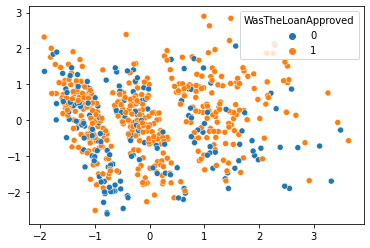

In [27]:
# 27. (1pts) Plot the First 2 Dimensions of the PCA Transformation

# Use sns.scatterplot to plot the PCA transformed training set
#   with the first column on the x-axis and the second column on the y-axis
#   colored by (hue=) the target y_train
sns.scatterplot(x = X_train_pca[:,0], y = X_train_pca[:,1], hue = y_train)

# The white bands you see are due to our one-hot features.
# Note that the target categories are still very mixed
# Our models will have a difficult time with the data as is.
# Additional features and feature engineering would be needed for this task.